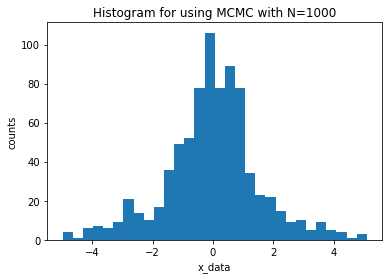

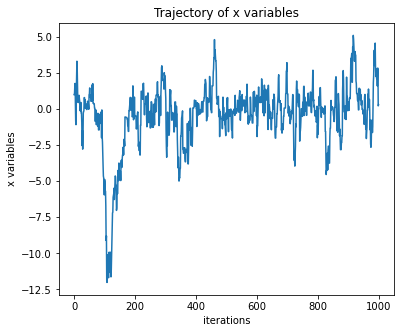

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm



def cau_func(x):
    y = 1/(np.pi* (1+x**2))
    return y

x_dis =[1] 
N_itr=1000

for i in range(N_itr):
    x_current = x_dis[i] 
    j = np.random.normal(x_current,1)
    r = cau_func(j)/cau_func(x_current)
    if r>= 1: 
        x_dis.append(j)
    elif np.random.uniform(0,1)<r:
        x_dis.append(j)
    else: x_dis.append(x_current)
#     print(x_current,j,r)

burn = 200
converging_x_dis = x_dis[burn:]     
plt.hist(converging_x_dis,bins ='auto')
plt.xlabel('x_data')
plt.ylabel('counts')
plt.title('Histogram for using MCMC with N=%i'%N_itr)

plt.figure(figsize=(6,5))
plt.plot(x_dis)
plt.title('Trajectory of x variables')
plt.xlabel('iterations')
plt.ylabel('x variables')

plt.show()


# (b) Median and 95 IC 

In [6]:

median_x = np.median(converging_x_dis)
SE = np.pi*(1 + median_x**2)/(2*np.sqrt(len(x_dis)))

zscore95 = 1.96

lower_b = median_x-zscore95*SE
upper_b = median_x+zscore95*SE
CI95 = [lower_b , upper_b]

print('================ suggested method of SE and 95 IC ==================')
print('Median = ', median_x, ' Standar Error = ',SE )
print('95% Confidence intervals = ', CI95)



================ suggested method of SE and 95 IC ==================
Median =  0.013310917575171888  Standar Error =  0.04965692015082555
95% Confidence intervals =  [-0.08401664592044618, 0.11063848107078995]
